<h1>Open Haloscope</h1>
<h2>Expected axion sensitivity and signal-to-noise ratio</h2>

The signal is calculated with the axion parameters...

The considered noise sources are...

<h4>Imports</h4>

In [1]:
import sys
sys.path.append(r"C:\Users\nicol\Open Haloscope\lib")
experiments_folder = r"C:\Users\nicol\Open Haloscope/data/experiments/"

# sys.path.append('/Users/ncr/Desktop/Progetti/Open-Haloscope/lib')
# experiments_folder = '/Users/ncr/Desktop/Progetti/Open-Haloscope/data/experiments/'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# plot options
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size=14)
%config InlineBackend.figure_format='retina'

In [3]:
# Particles
import open_haloscope.particles as particles
ax = particles.DMAxion()

# Experiment
import open_haloscope.experiment as experiment
haloscope_json = experiments_folder + 'alca_haloscope.json'
H = experiment.FermionicHaloscope(haloscope_json)

# OH Utils
import open_haloscope.utils as utils
eV_to_Hz = utils.OHUtils.eV_to_Hz

<h3>Axions</h3>

In [4]:
ax.print_axion_parameters()

Local dark matter density: 0.4 GeV/cm3
Relative speed of the dark matter wind: 0.001c = 299792.458 m/s
DFSZ axion coupling: 8.943e-11/mass, with upper limit 0.3 and lower limit 2e-05


In [5]:
# axion
m_a = 40e-6 # axion mass in eV
f_a = eV_to_Hz(m_a)
omega_a = 2*np.pi * f_a

# effective axion field
b_a = ax.effective_field(m_a)

<h3>Haloscope</h3>

In [6]:
H.experiment_parameters

{'_Alca_haloscope_parameters': 'Parameters of the fermionic haloscope Alca.',
 'f0': 2000000.0,
 'Q': 100}

<h3>Sensitivity and limits</h3>

Text(0, 0.5, '$|g_p|$')

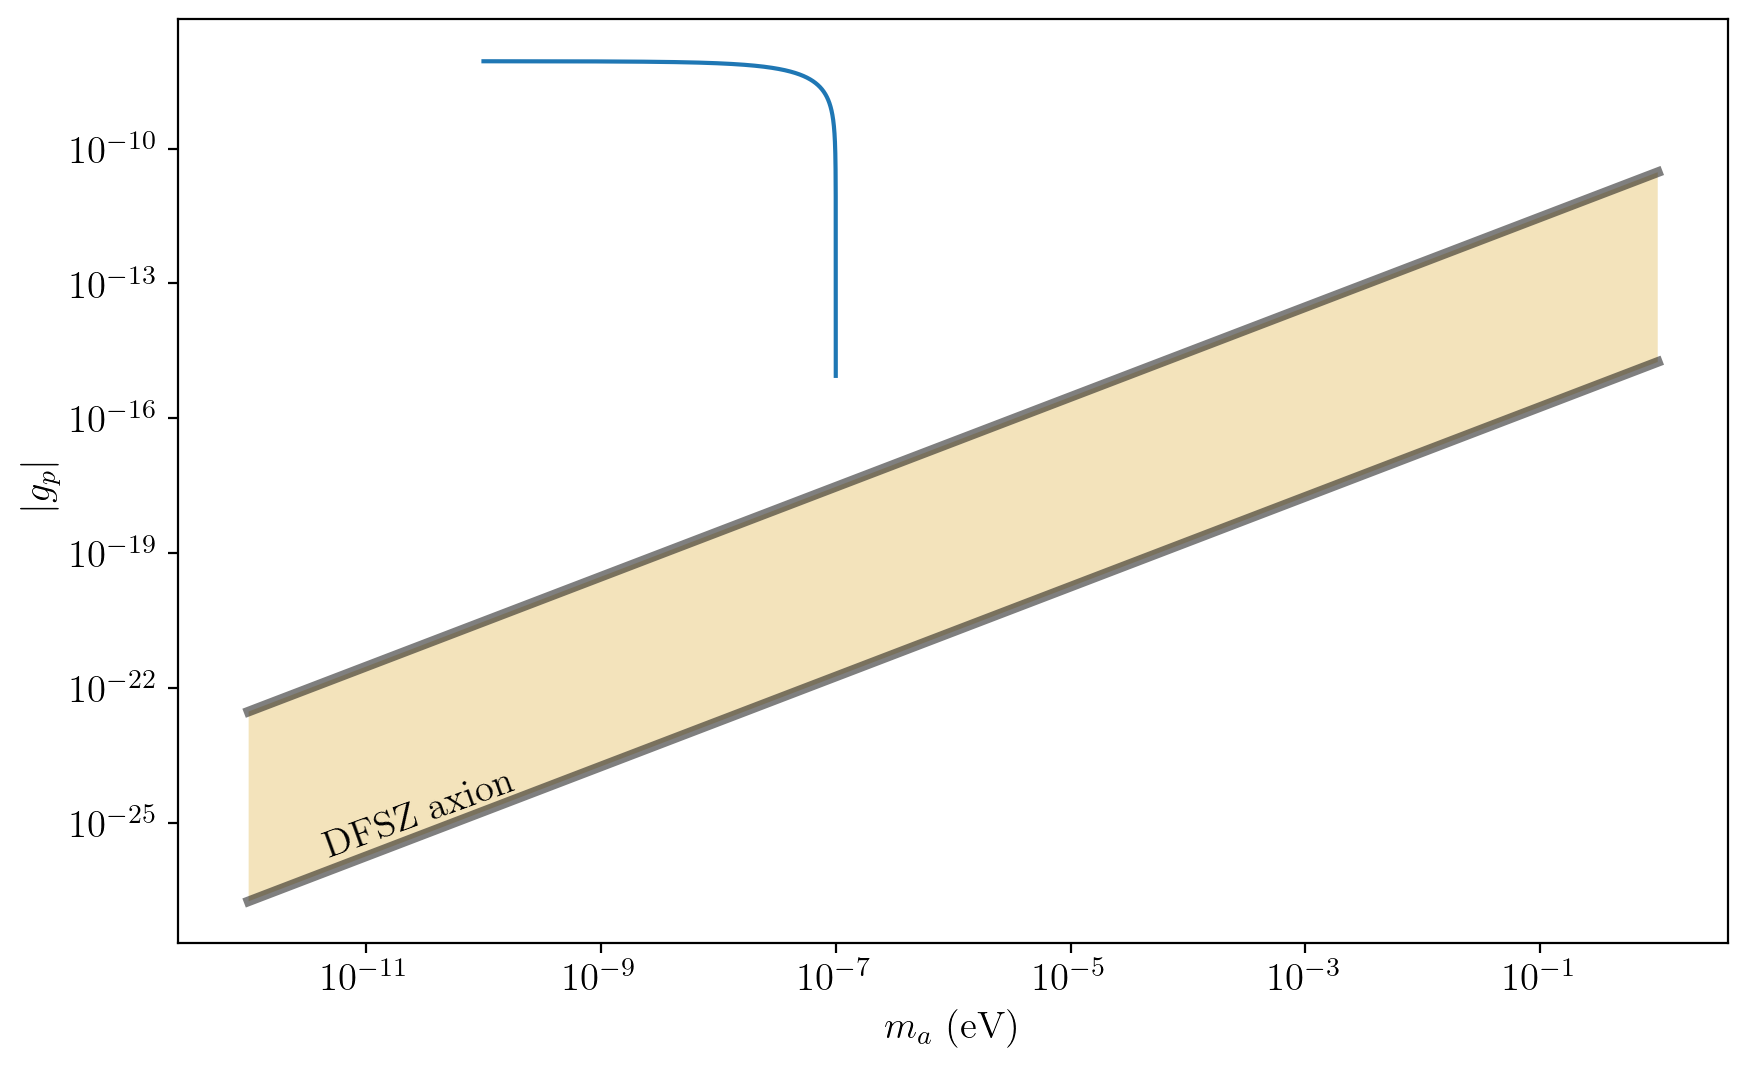

In [7]:
plt.figure(figsize=(10,6))

mass_start = 1e-12
mass_stop = 1
mass_points = 10001
m_range = np.logspace(np.log10(mass_start), np.log10(mass_stop), mass_points)

ax.plot_DFSZ_axion(m_range)
plt.plot(np.linspace(1e-10, 1e-7, 1001), ax.field_to_g_p(np.linspace(1e-15, 1e-22, 1001)))

plt.xlabel('$m_a$ (eV)')
plt.ylabel('$|g_p|$')